# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS
# Ensemble Learning

These commands use the `%pip` magic command in a Jupyter notebook to upgrade several important Python libraries to their latest versions. Each line upgrades a specific package:

- `numpy`: a fundamental package for numerical computing in Python, widely used for array operations and mathematical functions.
- `pandas`: a powerful library for data manipulation and analysis, especially with tabular data.
- `matplotlib`: a popular library for creating static, animated, and interactive visualizations in Python.
- `scikit-learn`: a widely used machine learning library that provides simple and efficient tools for data mining and data analysis.
- `scipy`: a library that builds on numpy and provides additional functionality for scientific and technical computing.
- `lightgbm`: a fast, distributed, high-performance gradient boosting framework used for machine learning tasks, especially with large datasets.

Using `--upgrade` ensures that each package is updated to the latest available version, which can help avoid compatibility issues and provide access to new features and bug fixes. The `%pip` magic is specific to Jupyter environments and ensures that the installation is performed in the correct Python environment associated with the notebook.

In [1]:
%pip install --upgrade --quiet --exists i numpy > /dev/null 2>&1
%pip install --upgrade --quiet --exists i pandas > /dev/null 2>&1
%pip install --upgrade --quiet --exists i matplotlib > /dev/null 2>&1
%pip install --upgrade --quiet --exists i scikit-learn > /dev/null 2>&1
%pip install --upgrade --quiet --exists i scipy > /dev/null 2>&1
%pip install --upgrade --quiet --exists i xgboost > /dev/null 2>&1
%pip install --upgrade --quiet --exists i catboost > /dev/null 2>&1
%pip install --upgrade --quiet --exists i lightgbm > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


This code block imports a variety of essential Python libraries and modules commonly used in data science and machine learning workflows. 

- `numpy` and `pandas` are imported for numerical operations and data manipulation, with their standard aliases `np` and `pd`.
- `matplotlib.pyplot` is imported as `plt` for creating visualizations.
- Several modules from `scikit-learn` are imported, including classifiers like `DecisionTreeClassifier`, ensemble methods such as `BaggingClassifier`, `RandomForestClassifier`, `AdaBoostClassifier`, and `GradientBoostingClassifier`, as well as tools for model evaluation and hyperparameter tuning (`cross_val_score`, `GridSearchCV`, `RandomizedSearchCV`, and `train_test_split`).
- From `scipy.stats`, `randint` and `uniform` are imported for generating random distributions, which are often used in randomized hyperparameter searches.
- `LGBMClassifier` from the `lightgbm` library is imported for efficient gradient boosting, with `# type: ignore` to suppress type-checking warnings if type stubs are missing.
- Finally, the `warnings` module is used to suppress user warnings by calling `warnings.filterwarnings("ignore", category=UserWarning)`, which helps keep the notebook output clean and focused on relevant results. 

Together, these imports set up the environment for building, tuning, and evaluating a variety of machine learning models, especially those involving ensemble learning techniques.

In [2]:
import numpy                                                 as np
import pandas                                                as pd
from   matplotlib              import pyplot                 as plt
from   sklearn.tree            import DecisionTreeClassifier 
from   sklearn.model_selection import cross_val_score
from   sklearn.model_selection import GridSearchCV
from   sklearn.model_selection import train_test_split
from   sklearn.model_selection import RandomizedSearchCV
from   sklearn.ensemble        import BaggingClassifier
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.ensemble        import AdaBoostClassifier
from   sklearn.ensemble        import GradientBoostingClassifier
from   scipy.stats             import randint
from   scipy.stats             import uniform
from   lightgbm                import LGBMClassifier              # type: ignore
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Dataset
[Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) (from Kaggle)
The dataset contains 303 rows and 14 columns, with the following features:
- `age`: Age of the patient
- `sex`: Gender of the patient (1 = male; 0 = female)
- `cp`: Chest pain type (0-3)
- `trestbps`: Resting blood pressure (in mm Hg)
- `chol`: Serum cholesterol (in mg/dl)
- `fbs`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: Resting electrocardiographic results (0-2)
- `thalach`: Maximum heart rate achieved
- `exang`: Exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: Slope of the peak exercise ST segment (0-2)
- `ca`: Number of major vessels (0-3) colored by fluoroscopy
- `thal`: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)
- `target`: Diagnosis of heart disease (1 = presence; 0 = absence)
- `target_name`: Name of the target variable (heart disease)
- `target_description`: Description of the target variable (presence or absence of heart disease)

This code reads a CSV file named `'data/heart.csv'` into a pandas DataFrame called `df`. The `pd.read_csv` function is a standard way to load tabular data from a CSV file into Python for analysis. By default, it automatically infers the column names from the first row and assigns appropriate data types to each column. After loading the data, the variable `df` contains the entire dataset, which can then be used for further data processing, analysis, or machine learning tasks. The second line, `df`, simply displays the contents of the DataFrame, allowing you to inspect the imported data directly in the notebook or output pane. This is a common first step in any data science workflow to ensure the data has been loaded correctly.

In [3]:
df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


This line splits the dataset into features and the target variable for a machine learning task. The variable `X` is assigned the first eight columns of the DataFrame `df`, which represent the input features used to make predictions. This is done using `df.iloc[:, :8]`, which selects all rows and columns from position 0 up to (but not including) position 8. The variable `y` is assigned the values from the `'output'` column of `df`, which serves as the target variable or label that the model will learn to predict. This separation of features (`X`) and target (`y`) is a standard preprocessing step before training most machine learning models.

In [4]:
X, y = df.iloc[:, :8], df['output']

This code prepares the feature matrix `X` for use in machine learning models by encoding categorical variables as numerical values. First, it converts the `'cp'` column (which likely represents chest pain type) to a string data type using `astype(str)`. This ensures that pandas recognizes `'cp'` as a categorical variable rather than a numeric one, which is important for the next step.

Next, `pd.get_dummies(X)` is called to perform one-hot encoding on all categorical columns in `X`. One-hot encoding creates new columns for each unique value in the categorical variables, filling them with binary indicators (0 or 1) to represent the presence of each category. This transformation is necessary because most machine learning algorithms require numerical input and cannot directly handle categorical data.

Finally, the transformed DataFrame is assigned back to `X`, replacing the original version. Displaying `X` shows the resulting DataFrame, where categorical variables have been expanded into multiple binary columns, making the data suitable for modeling.

In [5]:
X['cp'] = X['cp'].astype(str)
X = pd.get_dummies(X)
X

,age,sex,trtbps,chol,fbs,restecg,thalachh,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,False,False,False,True
1,37,1,130,250,0,1,187,False,False,True,False
2,41,0,130,204,0,0,172,False,True,False,False
3,56,1,120,236,0,1,178,False,True,False,False
4,57,0,120,354,0,1,163,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,True,False,False,False
299,45,1,110,264,0,1,132,False,False,False,True
300,68,1,144,193,1,1,141,True,False,False,False
301,57,1,130,131,0,1,115,True,False,False,False


This line calculates the mean (average) value of the target variable `y`. In the context of a classification problem where `y` contains binary values (such as 0 for absence and 1 for presence of a condition), `y.mean()` returns the proportion of samples labeled as 1. This is a quick way to check the class balance in your dataset, helping you understand how common the positive class is compared to the negative class. For example, if `y.mean()` returns 0.55, it means that 55% of the samples belong to the positive class.

In [6]:
print('Y Average___________:',y.mean())
print('Y Standard Deviation:',y.std())
print('X Average___________:')
print(X.mean())
print('X Standard Deviation:')
print(X.std())
print('X Min_______________:')
print(X.min())
print('X Max_______________:')
print(X.max())
print('X Shape______________:',X.shape)
print('Y Shape______________:',y.shape)

Y Average___________: 0.5445544554455446
Y Standard Deviation: 0.4988347841643926
X Average___________:
age          54.366337
sex           0.683168
trtbps      131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalachh    149.646865
cp_0          0.471947
cp_1          0.165017
cp_2          0.287129
cp_3          0.075908
dtype: float64
X Standard Deviation:
age          9.082101
sex          0.466011
trtbps      17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalachh    22.905161
cp_0         0.500038
cp_1         0.371809
cp_2         0.453171
cp_3         0.265288
dtype: float64
X Min_______________:
age            29
sex             0
trtbps         94
chol          126
fbs             0
restecg         0
thalachh       71
cp_0        False
cp_1        False
cp_2        False
cp_3        False
dtype: object
X Max_______________:
age           77
sex            1
trtbps       200
chol         564
fbs            1
restecg 

## Basic decision tree
This code demonstrates how to train and evaluate a decision tree classifier using scikit-learn. First, a `DecisionTreeClassifier` object is created and assigned to the variable `tree_model`. By default, this classifier uses the Gini impurity criterion to determine the best splits in the data.

Next, the `fit` method is called with the feature matrix `X` and target vector `y`. This trains the decision tree on the entire dataset, allowing it to learn patterns that distinguish between the classes in `y` based on the features in `X`.

Finally, `tree_model.score(X, y)` computes the mean accuracy of the trained model on the same data it was trained on. This method predicts the class labels for `X` and compares them to the true labels in `y`, returning the proportion of correct predictions. Note that evaluating accuracy on the training data can lead to an overestimate of model performance, as the model may overfit and memorize the training examples. For a more realistic assessment, it's better to evaluate on a separate test set.

In [7]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)
tree_model.score(X, y)

1.0

This code block demonstrates how to train and evaluate a decision tree classifier using a proper train-test split. \
First, the `train_test_split` function randomly divides the feature matrix `X` and target vector `y` into training and testing sets. \
By default, 75% of the data is used for training (`X_train`, `y_train`), and 25% is used for testing (`X_test`, `y_test`). \
This ensures that model evaluation is performed on data the model has not seen during training.

A `DecisionTreeClassifier` instance is then created and trained on the training data using the `fit` method. \
After training, the model's accuracy is evaluated in three ways:
- on the test set (`tree_model.score(X_test, y_test)`),
- on the training set (`tree_model.score(X_train, y_train)`),
- and on the entire dataset (`tree_model.score(X, y)`).

The results are printed as percentages. \
Comparing these scores helps you detect overfitting: if the training accuracy is much higher than the test accuracy, the model may be memorizing the training data rather than learning generalizable patterns. This workflow is a standard approach in machine learning to assess model performance and generalization.

In [8]:
X_train, \
X_test,  \
y_train, \
y_test     = train_test_split(X, y) 
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print("X_test , y_test  Accuracy: {:10.2f}%".format(tree_model.score(X_test, y_test)*100))
print("X_train, y_train Accuracy: {:10.2f}%".format(tree_model.score(X_train, y_train)*100))
print("X      , Y       Accuracy: {:10.2f}%".format(tree_model.score(X, y)*100))

X_test , y_test  Accuracy:      72.37%
X_train, y_train Accuracy:     100.00%
X      , Y       Accuracy:      93.07%


This code evaluates the performance of a decision tree classifier using 10-fold cross-validation. The `cross_val_score` function splits the dataset (`X`, `y`) into 10 equal parts (folds). For each fold, the model is trained on 9 parts and tested on the remaining part, repeating this process 10 times so that each part is used as a test set once. The function returns an array of accuracy scores, one for each fold, which are stored in `tree_cv`.

The next line prints the mean accuracy across all folds, formatted to five decimal places. This average score (`tree_cv.mean()`) provides a more reliable estimate of the model's generalization performance than a single train/test split, as it reduces the impact of how the data is divided. Cross-validation is a standard technique for assessing model robustness and detecting overfitting.

In [9]:
tree_cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)
print("Tree CV Mean: {:10.5f}".format(tree_cv.mean()))

Tree CV Mean:    0.68645


## Bagging
On training:
1. Sample a proportion of the data points with replacement (`max_samples`).
2. Build a tree with this sample.
3. Repeat as many times as desired (`n_estimators`).

On prediction:
1. Predict on all trees in parallel.
2. Average the predictions (in classification, take a majority vote).

This code demonstrates how to use the Bagging ensemble method for classification with scikit-learn. First, a `BaggingClassifier` object is created and assigned to `bagging_model`. The parameters specify that 10 base estimators (by default, decision trees) will be used, and each will be trained on a random sample containing 100% of the original data points (with replacement).

Next, the `fit` method trains the ensemble on the feature matrix `X` and target vector `y`. Each base estimator is trained on a different bootstrap sample of the data, introducing diversity among the models.

Finally, `bagging_model.score(X, y)` evaluates the mean accuracy of the ensemble on the same data it was trained on. This method predicts the class labels for `X` using the aggregated predictions from all base estimators (typically by majority vote) and compares them to the true labels in `y`. The result is the proportion of correct predictions. Note that evaluating on the training data may overestimate performance due to overfitting; for a more realistic assessment, use a separate test set or cross-validation.

In [10]:
bagging_model = BaggingClassifier(n_estimators=10, max_samples=1.0)
bagging_model.fit(X, y)
print("Bagging Model Accuracy: {:10.2f}%".format(bagging_model.score(X, y)*100))

Bagging Model Accuracy:      97.69%


This code evaluates the performance of a Bagging ensemble classifier using 10-fold cross-validation. The `cross_val_score` function splits the dataset (`X`, `y`) into 10 equal parts (folds). For each fold, a new `BaggingClassifier` is trained on 9 parts and tested on the remaining part, repeating this process 10 times so that each part serves as the test set once. The function returns an array of accuracy scores, one for each fold, which are stored in `bagging_cv`.

The next line prints the mean accuracy across all folds, formatted to five decimal places. This average score (`bagging_cv.mean()`) provides a more reliable estimate of the model's generalization performance than a single train/test split, as it reduces the impact of how the data is divided. Cross-validation is a standard technique for assessing the robustness and expected real-world accuracy of machine learning models.

In [11]:
bagging_cv = cross_val_score(BaggingClassifier(), X, y, cv=10)
print("Bagging CV Mean: {:10.5f}".format(bagging_cv.mean()))

Bagging CV Mean:    0.74258


This code performs hyperparameter tuning for a Bagging ensemble classifier using grid search with cross-validation. 

First, a parameter grid (`param_grid`) is defined as a dictionary. It specifies two hyperparameters to search over: `n_estimators`, which is the number of base estimators (ranging from 5 to 20), and `max_samples`, which is the proportion of the dataset to sample for each base estimator (ranging from 0.3 to 1.0 in steps of 0.1, rounded to two decimal places).

Next, a `GridSearchCV` object is created. This object takes a `BaggingClassifier` as the estimator, the parameter grid, uses accuracy as the scoring metric, and performs 5-fold cross-validation (`cv=5`). `GridSearchCV` will exhaustively try all combinations of the specified hyperparameters, training and validating the model for each combination.

Finally, `bagging_cv.fit(X, y)` runs the grid search on the dataset. It fits multiple BaggingClassifier models with different hyperparameter settings, evaluates their performance using cross-validation, and identifies the combination that yields the best average accuracy. This process helps find the most effective hyperparameter values for the Bagging ensemble on the given data.

In [12]:
param_grid = {'n_estimators': np.arange(5, 21, 1),'max_samples': np.arange(0.3, 1.1, 0.1).round(2)}
bagging_cv = GridSearchCV(BaggingClassifier(), param_grid, scoring='accuracy', cv=5)
bagging_cv.fit(X, y)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_samples': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
             scoring='accuracy')

These two lines display the results of the grid search performed with `GridSearchCV` on the Bagging ensemble classifier. The first line prints the best estimator found during the search, which is the BaggingClassifier instance with the combination of hyperparameters (`n_estimators` and `max_samples`) that achieved the highest average accuracy during cross-validation. The second line prints the corresponding best accuracy score, showing how well this optimal model performed on average across the validation folds. This information helps you understand which hyperparameter settings are most effective for your dataset and how well the tuned model is expected to generalize.

In [13]:
print(bagging_cv.best_estimator_)
print('Accuracy: {:10.2f}%'.format(bagging_cv.best_score_*100))

BaggingClassifier(max_samples=np.float64(0.7), n_estimators=np.int64(5))
Accuracy:      77.56%


This code visualizes the results of a grid search for a Bagging ensemble classifier by creating a heatmap of model accuracy scores for different hyperparameter combinations. The first line reshapes the array of mean test scores from the grid search (`bagging_cv.cv_results_['mean_test_score']`) into a 2D matrix (`acc`), where the rows correspond to different values of `n_estimators` and the columns correspond to different values of `max_samples`. This makes it easier to plot the results as a grid.

A new figure is created with a size of 10x10 inches. The `plt.imshow` function displays the accuracy matrix as an image, with the origin set to 'lower' so that the first row and column appear at the bottom left. The x-axis and y-axis ticks are set to match the tested values of `max_samples` and `n_estimators`, respectively, and the x-axis labels are rotated vertically for readability.

The plot is given a title ("Model accuracy"), and the axes are labeled to indicate which hyperparameter each axis represents. A colorbar is added to show the mapping between color intensity and accuracy values. Finally, `plt.show()` displays the heatmap. This visualization helps you quickly identify which combinations of `n_estimators` and `max_samples` yield the highest model accuracy, making it easier to interpret the results of hyperparameter tuning.

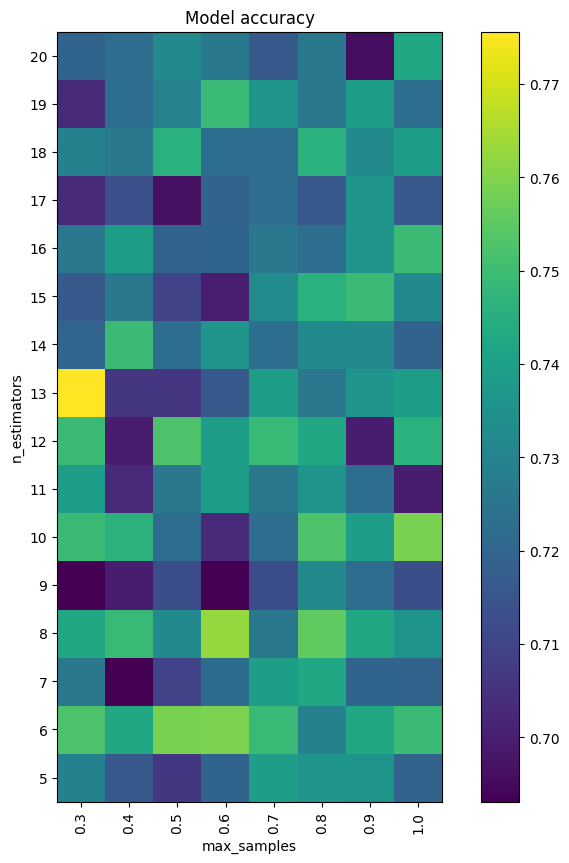

In [14]:
acc = bagging_cv.cv_results_['mean_test_score'].reshape(len(param_grid['n_estimators']), len(param_grid['max_samples']))
plt.figure(figsize=(10, 10))
plt.imshow(acc, origin='lower')
plt.xticks(range(len(param_grid['max_samples'])), param_grid['max_samples'], rotation=90)
plt.yticks(range(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.title('Model accuracy')
plt.xlabel('max_samples')
plt.ylabel('n_estimators')
plt.colorbar()
plt.show()

## Random forests
Like bagging, but only a sample of predictors are used in each tree (`max_features`). This sample is without replacement.

Random forests can be understood as a generalization of the basic bagging strategy.
This code demonstrates how to train and evaluate a Random Forest classifier using scikit-learn. First, a `RandomForestClassifier` object is created and assigned to `rforest_model`. The parameters specify that the ensemble will consist of 100 decision trees (`n_estimators=100`). For each split in a tree, only a random subset of features equal to the square root of the total number of features (`max_features='sqrt'`) is considered, which helps introduce diversity among the trees and reduce overfitting. The `max_samples=1.0` parameter means each tree is trained on a bootstrap sample containing 100% of the original data points (with replacement).

Next, the `fit` method trains the random forest on the feature matrix `X` and target vector `y`. Each tree in the forest is trained on a different random subset of the data and features, making the ensemble robust to overfitting and improving generalization.

Finally, `rforest_model.score(X, y)` computes the mean accuracy of the trained model on the same data it was trained on. This method predicts the class labels for `X` using the majority vote from all trees and compares them to the true labels in `y`, returning the proportion of correct predictions. Note that evaluating accuracy on the training data can overestimate performance due to possible overfitting; for a more realistic assessment, use a separate test set or cross-validation.

In [15]:
rforest_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_samples=1.0)
rforest_model.fit(X, y)
print('Random Forest Accuracy: {:10.2f}%'.format(rforest_model.score(X, y)*100))

Random Forest Accuracy:     100.00%


This code evaluates the performance of a Random Forest classifier using 10-fold cross-validation. The `cross_val_score` function splits the dataset (`X`, `y`) into 10 equal parts (folds). For each fold, a new `RandomForestClassifier` is trained on 9 parts and tested on the remaining part, repeating this process 10 times so that each part serves as the test set once. The function returns an array of accuracy scores, one for each fold, which are stored in `rforest_cv`.

The next line prints the mean accuracy across all folds, formatted as a percentage with two decimal places. This average score (`rforest_cv.mean()`) provides a more reliable estimate of the model's generalization performance than a single train/test split, as it reduces the impact of how the data is divided. Cross-validation is a standard technique for assessing the robustness and expected real-world accuracy of machine learning models.

In [16]:
rforest_cv = cross_val_score(RandomForestClassifier(), X, y, cv=10)
print('Random Forest CV Mean: {:10.2f}%'.format(rforest_cv.mean()))

Random Forest CV Mean:       0.76%


This code performs hyperparameter optimization for a Random Forest classifier using randomized search with cross-validation. The `param_distributions` dictionary defines the hyperparameters to tune: `n_estimators` (the number of trees, sampled randomly between 10 and 499), `max_features` (the number of features considered at each split, chosen from 'sqrt', 'log2', 5, or 8), and `max_samples` (the proportion of samples used to train each tree, drawn from a uniform distribution between 0 and 1).

A `RandomizedSearchCV` object is then created, which will sample 60 different combinations of these hyperparameters (`n_iter=60`) and evaluate each using cross-validation. This approach is more efficient than grid search when the parameter space is large, as it explores a random subset of possible combinations. The `fit(X, y)` call runs the search on the dataset, training and validating models to find the combination of hyperparameters that yields the best performance. This process helps identify a well-performing Random Forest configuration without exhaustively testing every possible parameter set.

In [17]:
param_distributions = {'n_estimators': randint(10, 500),'max_features': ['sqrt', 'log2', 5, 8],'max_samples': uniform(loc=0, scale=1)}
rforest_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions, n_iter=60)
rforest_cv.fit(X, y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=60,
                   param_distributions={'max_features': ['sqrt', 'log2', 5, 8],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17b8ad940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17b8ad010>})

This code block displays the results of the hyperparameter search performed with `RandomizedSearchCV` for a Random Forest classifier. The first line prints a header, "Best Parameters," to indicate that the following output will show the optimal hyperparameter values found during the search.

The next three lines print the specific values for the best combination of hyperparameters: `n_estimators` (the number of trees in the forest), `max_features` (the number of features considered at each split), and `max_samples` (the proportion of samples used to train each tree). These values are accessed from the `best_estimator_` attribute of the fitted `rforest_cv` object, which holds the Random Forest model with the highest cross-validated accuracy.

The final line prints the best accuracy score achieved during the search, formatted as a percentage with two decimal places. This value is obtained from `rforest_cv.best_score_`, which represents the mean cross-validation accuracy for the optimal hyperparameter combination. Together, these print statements summarize the outcome of the hyperparameter tuning process, helping you understand which settings led to the best model performance.

In [18]:
print('Best Parameters')
print('n_estimators:', rforest_cv.best_estimator_.n_estimators)
print('max_features:', rforest_cv.best_estimator_.max_features)
print('max_samples :', rforest_cv.best_estimator_.max_samples)
print('Accuracy    : {:10.2f}%'.format( rforest_cv.best_score_*100))

Best Parameters
n_estimators: 40
max_features: 8
max_samples : 0.21146535461373006
Accuracy    :      77.89%


This code visualizes the probability of finding at least one of the top-performing hyperparameter combinations during a randomized search. The variable `top` is set to 0.05, representing the top 5% of all possible hyperparameter configurations. `n_iter` is an array from 1 to 99, representing the number of random combinations tested.

The expression `1 - (1 - top)**n_iter` calculates the probability of finding at least one configuration in the top 5% after testing `n_iter` random combinations. This is plotted as a curve, showing how the probability increases as more combinations are tested. The vertical line at 60 (`plt.axvline(60)`) highlights the case where 60 combinations are tested, and the horizontal line (`plt.axhline(1 - (1 - top)**60)`) shows the corresponding probability for 60 trials.

The x-axis is labeled as the number of hyperparameter combinations tested, and the y-axis shows the probability of finding a top-performing configuration. Finally, `plt.show()` displays the plot, and the last line prints the exact probability of finding at least one top 5% configuration after 60 trials. This helps justify the choice of `n_iter=60` in randomized hyperparameter search, showing that it gives a high chance of discovering a near-optimal model.

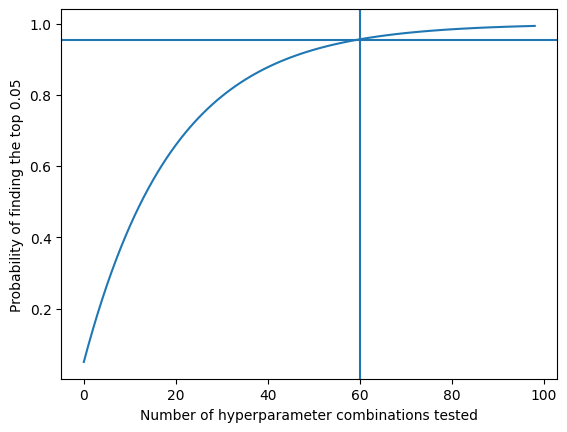

0.953930201013048


In [19]:
top = 0.05
n_iter = np.arange(1, 100)
plt.plot(1 - (1 - top)**n_iter)
plt.axvline(60)
plt.axhline(1 - (1 - top)**60)
plt.xlabel('Number of hyperparameter combinations tested')
plt.ylabel('Probability of finding the top %.2f' % top)
plt.show()
print(1 - (1 - top)**60)

## Boosting
On training:
1. Assign an equal weight to all data points, this weight will affect the classification objective.
2. Build a simple tree and make predictions with it (default `maxdepth=1`).
3. Increase the weight of missclassified points and decrease the weight of correct predictions.
4. Build the next tree.
5. Repeat as many times as desired (`n_estimators`).

On prediction:
1. Predict on all trees in parallel.
2. Average the predictions, possibly weighting by the accuracy of each tree, or by a pre-specified amount (`learning_rate`).

### Adaptive boosting
This code demonstrates how to train and evaluate an AdaBoost classifier using scikit-learn. The first line creates an `AdaBoostClassifier` object with default hyperparameters: 50 weak learners (`n_estimators=50`) and a learning rate of 1.0. By default, each weak learner is a decision tree with a maximum depth of 1 (a decision stump).

The `fit(X, y)` method trains the AdaBoost model on the feature matrix `X` and target vector `y`. During training, AdaBoost builds a sequence of weak learners, each focusing more on the samples that were misclassified by previous learners by adjusting their weights. This iterative process helps the ensemble correct its mistakes and improve overall performance.

Finally, `adaboost_model.score(X, y)` computes the mean accuracy of the trained model on the same data it was trained on. This method predicts the class labels for `X` and compares them to the true labels in `y`, returning the proportion of correct predictions. Note that evaluating accuracy on the training data may overestimate the model's real-world performance, as it does not account for overfitting. For a more realistic assessment, it is better to use a separate test set or cross-validation.

In [20]:
adaboost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0) # Default hyperparameters.
adaboost_model.fit(X, y)
adaboost_model.score(X, y)

0.8151815181518152

This code evaluates the performance of an AdaBoost classifier using 10-fold cross-validation. The `cross_val_score` function splits the dataset (`X`, `y`) into 10 equal parts (folds). For each fold, a new `AdaBoostClassifier` is trained on 9 parts and tested on the remaining part, repeating this process 10 times so that each part serves as the test set once. The function returns an array of accuracy scores, one for each fold, which are stored in `adaboost_cv`.

The next line, `adaboost_cv.mean()`, calculates the mean accuracy across all folds. This average score provides a more reliable estimate of the model's generalization performance than evaluating on a single train/test split, as it reduces the impact of how the data is divided. Cross-validation is a standard technique for assessing the robustness and expected real-world accuracy of machine learning models.

In [21]:
adaboost_cv = cross_val_score(AdaBoostClassifier(), X, y, cv=10)
adaboost_cv.mean()

np.float64(0.7787096774193547)

This code performs hyperparameter tuning for an AdaBoost classifier using grid search with cross-validation. The `param_grid` dictionary specifies that the number of estimators (`n_estimators`) should be tested at values from 1 to 50 in steps of 10 (i.e., 1, 11, 21, 31, 41, 51). 

A `GridSearchCV` object is then created, which takes an `AdaBoostClassifier` as the estimator, the parameter grid to search over, uses accuracy as the scoring metric, and performs 5-fold cross-validation (`cv=5`). This means that for each value of `n_estimators`, the model will be trained and validated 5 times on different splits of the data to estimate its performance.

Finally, `adaboost_cv.fit(X, y)` runs the grid search on the dataset, fitting multiple AdaBoost models with different numbers of estimators and identifying the value that yields the highest average accuracy. This process helps you select the most effective number of boosting rounds for your AdaBoost model.

In [22]:
param_grid = {'n_estimators': np.arange(1, 51, 10)}
adaboost_cv = GridSearchCV(AdaBoostClassifier(), param_grid, scoring='accuracy', cv=5)
adaboost_cv.fit(X, y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': array([ 1, 11, 21, 31, 41])},
             scoring='accuracy')

This code displays the results of the grid search performed with `GridSearchCV` for the AdaBoost classifier. The first line prints the best estimator found during the search, which is the AdaBoost model with the number of estimators (`n_estimators`) that achieved the highest average accuracy during cross-validation. The second line prints the corresponding best accuracy score, showing how well this optimal model performed on average across the validation folds. This output helps you understand which hyperparameter setting is most effective for your dataset and how well the tuned AdaBoost model is expected to generalize.

In [23]:
print(adaboost_cv.best_estimator_)
print('Accuracy:', adaboost_cv.best_score_)

AdaBoostClassifier(n_estimators=np.int64(21))
Accuracy: 0.785464480874317


This code visualizes the results of the grid search for the AdaBoost classifier by plotting model accuracy against the number of estimators. The first line creates a line plot where the x-axis represents the different values of `n_estimators` tested during grid search (from the `param_grid`), and the y-axis shows the corresponding mean cross-validation accuracy scores (`mean_test_score`) obtained for each value.

The next two lines label the axes: the x-axis is labeled as `'n_estimators'` to indicate the number of boosting rounds, and the y-axis is labeled as `'Model accuracy'` to show what the plotted values represent. Finally, `plt.show()` displays the plot. This visualization helps you quickly see how changing the number of estimators affects the AdaBoost model's accuracy, making it easier to select an appropriate value for this hyperparameter.

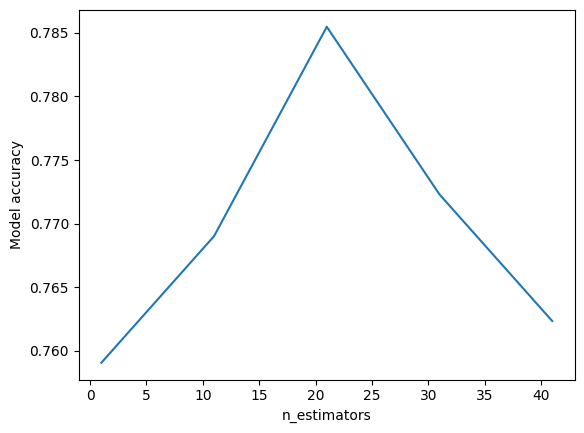

In [24]:
plt.plot(param_grid['n_estimators'], adaboost_cv.cv_results_['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Model accuracy')
plt.show()

### Gradient boosting

This code demonstrates how to train and evaluate a Gradient Boosting classifier using scikit-learn. First, a `GradientBoostingClassifier` object is created with 100 boosting stages (`n_estimators=100`) and a learning rate of 0.1, which are the default hyperparameters. The learning rate controls how much each additional tree contributes to the overall model, while `n_estimators` determines how many trees are added sequentially.

The `fit(X, y)` method then trains the model on the feature matrix `X` and target vector `y`. During training, the algorithm builds an ensemble of decision trees, where each new tree attempts to correct the errors of the combined previous trees by focusing on the residuals (the differences between the true and predicted values).

Finally, `gradientboost_model.score(X, y)` computes the mean accuracy of the trained model on the same data it was trained on. This method predicts the class labels for `X` and compares them to the true labels in `y`, returning the proportion of correct predictions. Note that evaluating accuracy on the training data may overestimate the model's real-world performance, as it does not account for overfitting. For a more realistic assessment, it is better to use a separate test set or cross-validation.

In [25]:
gradientboost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1) # Default hyperparameters.
gradientboost_model.fit(X, y)
gradientboost_model.score(X, y)

0.9603960396039604

This code evaluates the performance of a Gradient Boosting classifier using 10-fold cross-validation. The `cross_val_score` function splits the dataset (`X`, `y`) into 10 equal parts (folds). For each fold, a new `GradientBoostingClassifier` is trained on 9 parts and tested on the remaining part, repeating this process 10 times so that each part serves as the test set once. The function returns an array of accuracy scores, one for each fold, which are stored in `gradientboost_cv`.

The next line, `gradientboost_cv.mean()`, calculates the mean accuracy across all folds. This average score provides a more reliable estimate of the model's generalization performance than evaluating on a single train/test split, as it reduces the impact of how the data is divided. Cross-validation is a standard technique for assessing the robustness and expected real-world accuracy of machine learning models.

In [26]:
gradientboost_cv = cross_val_score(GradientBoostingClassifier(), X, y, cv=10)
gradientboost_cv.mean()

np.float64(0.7530107526881721)

This code performs hyperparameter tuning for a Gradient Boosting classifier using grid search with cross-validation. The `param_grid` dictionary defines the hyperparameters to search over: `n_estimators` (the number of boosting stages, tested at values from 10 to 60 in steps of 5) and `learning_rate` (the step size shrinkage, tested at 21 evenly spaced values between 0.05 and 1.5, rounded to two decimal places).

A `GridSearchCV` object is then created, which takes a `GradientBoostingClassifier` as the estimator, the parameter grid to search, uses accuracy as the scoring metric, and performs 5-fold cross-validation (`cv=5`). This means that for each combination of `n_estimators` and `learning_rate`, the model is trained and validated 5 times on different splits of the data to estimate its performance.

Finally, `gradientboost_cv.fit(X, y)` runs the grid search on the dataset, fitting multiple Gradient Boosting models with different hyperparameter combinations and identifying the settings that yield the highest average accuracy. This process helps you select the most effective hyperparameters for your Gradient Boosting model.

In [27]:
param_grid = {'n_estimators': np.arange(10, 61, 5),'learning_rate': np.linspace(0.05, 1.5, 21).round(2)}
gradientboost_cv = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='accuracy', cv=5)
gradientboost_cv.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.05, 0.12, 0.2 , 0.27, 0.34, 0.41, 0.48, 0.56, 0.63, 0.7 , 0.78,
       0.85, 0.92, 0.99, 1.06, 1.14, 1.21, 1.28, 1.36, 1.43, 1.5 ]),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])},
             scoring='accuracy')

This code displays the results of the grid search performed with `GridSearchCV` for the Gradient Boosting classifier. The first line prints the best estimator found during the search, which is the `GradientBoostingClassifier` instance with the combination of hyperparameters (`n_estimators` and `learning_rate`) that achieved the highest average accuracy during cross-validation. The second line prints the corresponding best accuracy score, showing how well this optimal model performed on average across the validation folds. This output helps you understand which hyperparameter settings are most effective for your dataset and how well the tuned Gradient Boosting model is expected to generalize.

In [28]:
print(gradientboost_cv.best_estimator_)
print('Accuracy:', gradientboost_cv.best_score_)

GradientBoostingClassifier(learning_rate=np.float64(0.63),
                           n_estimators=np.int64(10))
Accuracy: 0.7524590163934427


This code visualizes the results of a grid search for a Gradient Boosting classifier by creating a heatmap of model accuracy scores for different hyperparameter combinations. First, it reshapes the array of mean test scores from the grid search (`gradientboost_cv.cv_results_['mean_test_score']`) into a 2D matrix (`acc`). The matrix dimensions correspond to the number of `learning_rate` values (rows) and `n_estimators` values (columns) tested in the parameter grid, making it suitable for plotting as a grid.

A new figure is created with a size of 10x10 inches. The `plt.imshow` function displays the accuracy matrix as an image, with the origin set to 'lower' so that the first row and column appear at the bottom left. The x-axis and y-axis ticks are set to match the tested values of `n_estimators` and `learning_rate`, respectively, and the x-axis labels are rotated vertically for readability.

The plot is given a title ("Model accuracy"), and the axes are labeled to indicate which hyperparameter each axis represents. A colorbar is added to show the mapping between color intensity and accuracy values. Finally, `plt.show()` displays the heatmap. This visualization helps you quickly identify which combinations of `n_estimators` and `learning_rate` yield the highest model accuracy, making it easier to interpret the results of hyperparameter tuning.

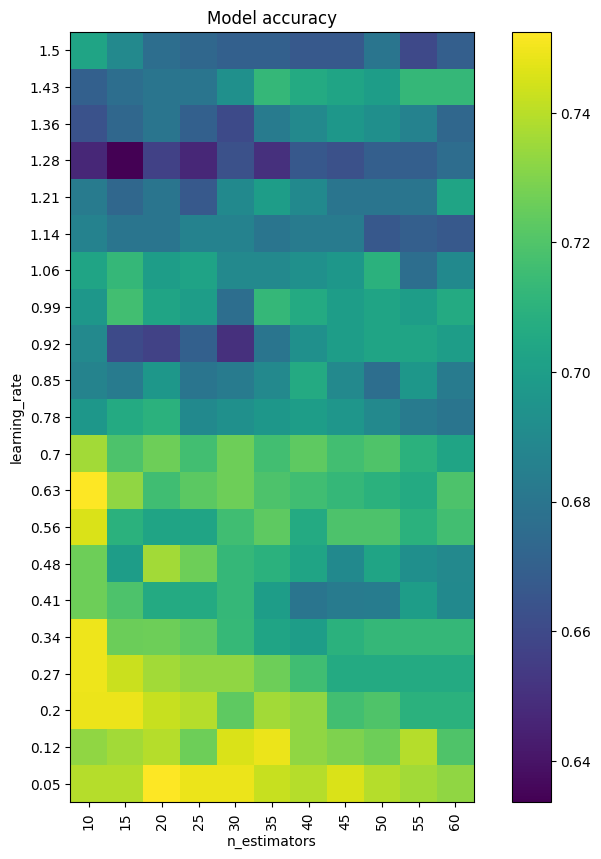

In [29]:
acc = gradientboost_cv.cv_results_['mean_test_score'].reshape(len(param_grid['learning_rate']), len(param_grid['n_estimators']))
plt.figure(figsize=(10, 10))
plt.imshow(acc, origin='lower')
plt.xticks(range(len(param_grid['n_estimators'])), param_grid['n_estimators'], rotation=90)
plt.yticks(range(len(param_grid['learning_rate'])), param_grid['learning_rate'])
plt.title('Model accuracy')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.colorbar()
plt.show()

#### LightGBM
This code demonstrates how to train and evaluate a LightGBM classifier using scikit-learn's `LGBMClassifier`. First, an `LGBMClassifier` object is created with 100 boosting rounds (`n_estimators=100`), no limit on tree depth (`max_depth=-1`), and verbosity turned off (`verbose=-1`). These are the default hyperparameters for this model.

The `fit(X, y)` method then trains the model on the feature matrix `X` and target vector `y`. LightGBM builds an ensemble of decision trees in a boosting framework, where each new tree attempts to correct the errors of the previous ensemble, leading to improved predictive performance.

Finally, `lgbm_model.score(X, y)` computes the mean accuracy of the trained model on the same data it was trained on. This method predicts the class labels for `X` and compares them to the true labels in `y`, returning the proportion of correct predictions. Note that evaluating accuracy on the training data may overestimate the model's real-world performance, as it does not account for overfitting. For a more realistic assessment, it is better to use a separate test set or cross-validation.

In [30]:
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=-1,verbose=-1)
lgbm_model.fit(X, y)
lgbm_model.score(X, y)

0.9933993399339934

This code evaluates the performance of a LightGBM classifier using 10-fold cross-validation. The `cross_val_score` function splits the dataset (`X`, `y`) into 10 equal parts (folds). For each fold, a new `LGBMClassifier` is trained on 9 parts and tested on the remaining part, repeating this process 10 times so that each part serves as the test set once. The function returns an array of accuracy scores, one for each fold, which are stored in `lgbm_cv`.

The next line, `lgbm_cv.mean()`, calculates the mean accuracy across all folds. This average score provides a more reliable estimate of the model's generalization performance than evaluating on a single train/test split, as it reduces the impact of how the data is divided. Cross-validation is a standard technique for assessing the robustness and expected real-world accuracy of machine learning models.

In [31]:
lgbm_cv = cross_val_score(LGBMClassifier(), X, y, cv=10,verbose=False)
lgbm_cv.mean()

np.float64(0.7592473118279571)

This code performs hyperparameter tuning for a LightGBM classifier using grid search with cross-validation. The `param_grid` dictionary defines the hyperparameters to search over: `n_estimators` (the number of boosting rounds, tested at values from 10 to 100 in steps of 5) and `max_depth` (the maximum depth of each tree, tested at values from 1 to 9). 

A `GridSearchCV` object is then created, which takes an `LGBMClassifier` as the estimator, the parameter grid to search, uses accuracy as the scoring metric, and performs 5-fold cross-validation (`cv=5`). This means that for each combination of `n_estimators` and `max_depth`, the model is trained and validated 5 times on different splits of the data to estimate its performance.

Finally, `lgbm_cv.fit(X, y)` runs the grid search on the dataset, fitting multiple LightGBM models with different hyperparameter combinations and identifying the settings that yield the highest average accuracy. This process helps you select the most effective hyperparameters for your LightGBM model.

In [32]:
param_grid = {'n_estimators': np.arange(10, 101, 5),'max_depth': np.arange(1, 10, 1)}
lgbm_cv = GridSearchCV(LGBMClassifier(), param_grid, scoring='accuracy', cv=5,verbose=False)
lgbm_cv.fit(X, y)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100])},
             scoring='accuracy', verbose=False)

The first line prints the best estimator found during the grid search with `GridSearchCV` for the LightGBM classifier. This best estimator is the `LGBMClassifier` instance with the combination of hyperparameters (`n_estimators` and `max_depth`) that achieved the highest average accuracy during cross-validation.

The second line prints the word "Accuracy:" followed by the value of `gradientboost_cv.best_score_`. However, this appears to be a mistake: it should likely print `lgbm_cv.best_score_` to show the best accuracy score for the LightGBM grid search, not the Gradient Boosting grid search. As written, it will display the best score from the Gradient Boosting model instead, which could be confusing or misleading if you are trying to evaluate the LightGBM results.

In [33]:
print(lgbm_cv.best_estimator_)
print('Accuracy:', gradientboost_cv.best_score_)

LGBMClassifier(max_depth=np.int64(2), n_estimators=np.int64(40))
Accuracy: 0.7524590163934427


This code visualizes the results of a grid search for a LightGBM classifier by creating a heatmap of model accuracy scores for different hyperparameter combinations. The first line reshapes the array of mean test scores from the grid search (`lgbm_cv.cv_results_['mean_test_score']`) into a 2D matrix (`acc`). The matrix dimensions correspond to the number of `max_depth` values (rows) and `n_estimators` values (columns) tested in the parameter grid, making it suitable for plotting as a grid.

A new figure is created with a size of 10x10 inches. The `plt.imshow` function displays the accuracy matrix as an image, with the origin set to 'lower' so that the first row and column appear at the bottom left. The x-axis and y-axis ticks are set to match the tested values of `n_estimators` and `max_depth`, respectively, and the x-axis labels are rotated vertically for readability.

The plot is given a title ("Model accuracy"), and the axes are labeled to indicate which hyperparameter each axis represents. A colorbar is added to show the mapping between color intensity and accuracy values. Finally, `plt.show()` displays the heatmap. This visualization helps you quickly identify which combinations of `n_estimators` and `max_depth` yield the highest model accuracy, making it easier to interpret the results of hyperparameter tuning.

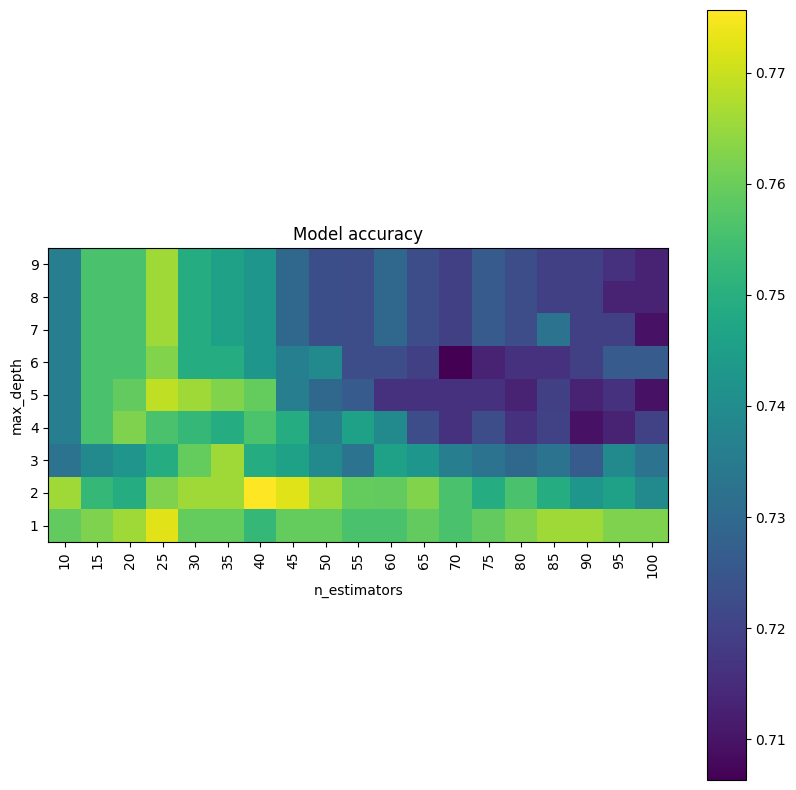

In [34]:
acc = lgbm_cv.cv_results_['mean_test_score'].reshape(len(param_grid['max_depth']), len(param_grid['n_estimators']))
plt.figure(figsize=(10, 10))
plt.imshow(acc, origin='lower')
plt.xticks(range(len(param_grid['n_estimators'])), param_grid['n_estimators'], rotation=90)
plt.yticks(range(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.title('Model accuracy')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.show()